In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [2]:
df = pd.read_csv('salary,satisfaction.csv' ,encoding ='unicode_escape')

In [3]:
df.head(5)

,id,Target_Salary,Target_Satisfied,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,...,homeaddress,latitude,longitude,PHONE,officeaddress,website,dateAdded,previousaddress,phones,CrimeTime
0,68407277,42405.00,0,"$3,600.00",Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â¢\tExcellent interpersonal and organizationa...,...,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328,(91) 555 22 82,"PO Box 4653, Stockton, California, 95204",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:30:00
1,68355089,60740.00,1,"$24,700.00","EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,...,"300 20th St S Birmingham, AL 35233 US",33.509722,-86.802756,NaN,"157 Adams St., Stockton, California, 95204",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:00:00
2,68341763,51907.68,0,"$20,000.00",Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,...,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437,NaN,"1950 W Freemont, Stockton, California, 95203",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:53:00
3,66310712,51907.68,0,"$35,000.00",Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Management Services Department,"Under direct supervision, assist in the routin...",1. Three years of full-time satisfactory exper...,1. A High School Diploma or GED. 2. CDL Dri...,...,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279,2125557818,"102 S. State St., Ukiah, California, 95482",http://www.ukiahbrewingco.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:50:00
4,68476807,35.00,1,"$10,400.00",Temporary Painter,PAINTER,Dept of Management & Planning,Responsibilities of selected candidates will i...,1. Five years of full-time satisfactory experi...,NaN,...,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220,26.47.1555,"13011 Newport Ave. #100, Tustin, California, 9...",http://www.tustinbrewery.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,22:31:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 83 columns):
id                            2946 non-null int64
Target_Salary                 2946 non-null float64
Target_Satisfied              2946 non-null int64
LOAN_AMT                      2946 non-null object
Business Title                2946 non-null object
Civil Service Title           2946 non-null object
Division/Work Unit            2946 non-null object
Job Description               2946 non-null object
Minimum Qual Requirements     2926 non-null object
Preferred Skills              2553 non-null object
Additional Information        1854 non-null object
To Apply                      2945 non-null object
Hours/Shift                   884 non-null object
Residency Requirement         2942 non-null object
Posting Date                  2942 non-null object
Posting Updated               2942 non-null object
Process Date                  2942 non-null object
FormalEducation             

In [5]:
df[['YearsCodingProf','Target_Salary']].head(30)

,YearsCodingProf,Target_Salary
0,3-5 years,42405.00
1,18-20 years,60740.00
2,6-8 years,51907.68
3,12-14 years,51907.68
4,0-2 years,35.00
5,3-5 years,35.00
6,0-2 years,50598.00
7,3-5 years,50623.00
8,21-23 years,90000.00
9,NaN,30683.00


In [6]:
df['LOAN_AMT'] = df['LOAN_AMT'].apply(lambda x: x.replace('$',''))
df['LOAN_AMT'] = df['LOAN_AMT'].apply(lambda x: x.replace(' ',''))
df['LOAN_AMT'] = df['LOAN_AMT'].apply(lambda x: x.replace(',',''))

In [7]:
df['LOAN_AMT'] = df['LOAN_AMT'].astype(float)

In [8]:
df.corr()

,id,Target_Salary,Target_Satisfied,LOAN_AMT,dti,last_pymnt_amnt,latitude,longitude
id,1.000000,-0.010424,0.017360,0.004329,0.037443,-0.021086,-0.006909,0.016005
Target_Salary,-0.010424,1.000000,0.007766,-0.005426,0.002491,0.009170,0.014446,-0.013123
Target_Satisfied,0.017360,0.007766,1.000000,-0.053278,0.001063,-0.049296,-0.005274,0.029954
LOAN_AMT,0.004329,-0.005426,-0.053278,1.000000,0.038297,0.435464,-0.021587,-0.013210
dti,0.037443,0.002491,0.001063,0.038297,1.000000,-0.050584,0.011303,-0.002151
last_pymnt_amnt,-0.021086,0.009170,-0.049296,0.435464,-0.050584,1.000000,0.006990,-0.014675
latitude,-0.006909,0.014446,-0.005274,-0.021587,0.011303,0.006990,1.000000,0.158156
longitude,0.016005,-0.013123,0.029954,-0.013210,-0.002151,-0.014675,0.158156,1.000000


In [9]:
df.columns

Index(['id', 'Target_Salary', 'Target_Satisfied', 'LOAN_AMT', 'Business Title',
       'Civil Service Title', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift',
       'Residency Requirement', 'Posting Date', 'Posting Updated',
       'Process Date', 'FormalEducation', 'UndergradMajor', 'CompanySize',
       'DevType', 'YearsCoding', 'YearsCodingProf', 'HopeFiveYears',
       'JobSearchStatus', 'LastNewJob', 'UpdateCV', 'CommunicationTools',
       'TimeFullyProductive', 'EducationTypes', 'SelfTaughtTypes',
       'TimeAfterBootcamp', 'HackathonReasons', 'AgreeDisagree1',
       'AgreeDisagree2', 'AgreeDisagree3', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'FrameworkWorkedWith',
       'FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'Methodology',
       'V

In [10]:
df.replace([np.NZERO,np.PZERO,np.inf],np.nan,inplace=True)

In [11]:
'''features = df.drop(['Job Description','Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift',
       'Residency Requirement', 'Posting Date', 'Posting Updated',
       'Process Date', 'FormalEducation', 'UndergradMajor','YearsCoding', 'HopeFiveYears',
       'JobSearchStatus', 'LastNewJob','UpdateCV', 'CommunicationTools',
       'TimeFullyProductive', 'EducationTypes', 'SelfTaughtTypes',
       'TimeAfterBootcamp', 'HackathonReasons', 'AgreeDisagree1',
       'AgreeDisagree2', 'AgreeDisagree3', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'FrameworkWorkedWith','FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'Methodology',
       'VersionControl', 'CheckInCode', 'AIDangerous', 'AIInteresting',
       'AIResponsible', 'AIFuture', 'Age', 'term', 'loan_status', 'pymnt_plan',
       'orignal_website_directory', 'purpose', 'title', 'zip_code','addr_state', 'dti', 'earliest_cr_line', 'last_pymnt_d',
                   'next_pymnt_d', 'last_credit_pull_d', 'Time',
                 'emp_length', 'your_favoritearticle_today', 'url', 'Email',
                 'homeaddress', 'latitude', 'longitude', 'PHONE', 'officeaddress',
                  'website', 'dateAdded', 'previousaddress', 'phones', 'CrimeTime'], axis=1)
'''






"features = df.drop(['Job Description','Minimum Qual Requirements', 'Preferred Skills',\n       'Additional Information', 'To Apply', 'Hours/Shift',\n       'Residency Requirement', 'Posting Date', 'Posting Updated',\n       'Process Date', 'FormalEducation', 'UndergradMajor','YearsCoding', 'HopeFiveYears',\n       'JobSearchStatus', 'LastNewJob','UpdateCV', 'CommunicationTools',\n       'TimeFullyProductive', 'EducationTypes', 'SelfTaughtTypes',\n       'TimeAfterBootcamp', 'HackathonReasons', 'AgreeDisagree1',\n       'AgreeDisagree2', 'AgreeDisagree3', 'LanguageWorkedWith',\n       'LanguageDesireNextYear', 'DatabaseWorkedWith',\n       'DatabaseDesireNextYear', 'PlatformWorkedWith',\n       'PlatformDesireNextYear', 'FrameworkWorkedWith','FrameworkDesireNextYear', 'IDE', 'OperatingSystem', 'Methodology',\n       'VersionControl', 'CheckInCode', 'AIDangerous', 'AIInteresting',\n       'AIResponsible', 'AIFuture', 'Age', 'term', 'loan_status', 'pymnt_plan',\n       'orignal_website_d

In [12]:
# After a long analysis these variables are being treated as features
features = df[['Target_Salary', 'Target_Satisfied','LOAN_AMT', 'Business Title',
       'Civil Service Title', 'Division/Work Unit', 'CompanySize', 'DevType',
       'YearsCodingProf', 'last_pymnt_amnt']]

In [13]:
features['YearsCodingProf'] = features['YearsCodingProf'].fillna('12-14 years')
features.dropna(inplace = True,axis=0)

D:\anacondaaa\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anacondaaa\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
features.isnull().sum()

Target_Salary          0
Target_Satisfied       0
LOAN_AMT               0
Business Title         0
Civil Service Title    0
Division/Work Unit     0
CompanySize            0
DevType                0
YearsCodingProf        0
last_pymnt_amnt        0
dtype: int64

In [15]:
variables = features.drop(['Target_Salary', 'Target_Satisfied'],axis=1)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

variables[['LOAN_AMT','last_pymnt_amnt']] = scaler.fit_transform(variables[['LOAN_AMT','last_pymnt_amnt']])
variables['LOAN_AMT'] = np.round(variables['LOAN_AMT'],2)
variables['last_pymnt_amnt'] = np.round(variables['last_pymnt_amnt'],2)
variables

,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,CompanySize,DevType,YearsCodingProf,last_pymnt_amnt
1,1.19,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,18-20 years,-0.51
4,-0.46,Temporary Painter,PAINTER,Dept of Management & Planning,"10,000 or more employees",Data or business analyst;Desktop or enterprise...,0-2 years,1.01
7,0.64,Associate Chemist,ASSOCIATE CHEMIST,DWOC Labs-Lefrak,10 to 19 employees,Designer;Front-end developer;QA or test developer,3-5 years,1.75
24,-0.97,HIGH PRESSURE PLANT TENDER,HIGH PRESSURE PLANT TENDER,Technical Services Department,100 to 499 employees,Mobile developer,3-5 years,-0.63
25,-1.18,HIGH PRESSURE PLANT TENDER,HIGH PRESSURE PLANT TENDER,Technical Services Department,20 to 99 employees,Full-stack developer,9-11 years,-0.64
...,...,...,...,...,...,...,...,...
2917,-0.05,Prosecuting Attorney,AGENCY ATTORNEY INTERNE,Prosecution Division,20 to 99 employees,DevOps specialist;System administrator,6-8 years,-0.66
2924,-0.28,SPECIAL PROJECTS ASSOCIATE,PRINCIPAL ADMINISTRATIVE ASSOC,Off of Human Capital Mgmt NM,100 to 499 employees,Back-end developer;DevOps specialist;System ad...,18-20 years,-0.61
2932,0.07,City Seasonal Aide/Security Guard,CITY SEASONAL AIDE,Arsenal North Peps,500 to 999 employees,Back-end developer;Designer;Desktop or enterpr...,15-17 years,0.20
2933,-0.51,City Seasonal Aide/Security Guard,CITY SEASONAL AIDE,Arsenal North Peps,500 to 999 employees,Back-end developer,0-2 years,-0.24


In [17]:
Reg_target = np.log(features['Target_Salary']) # np.log() for Homoscedasity
clf_target = features['Target_Satisfied']

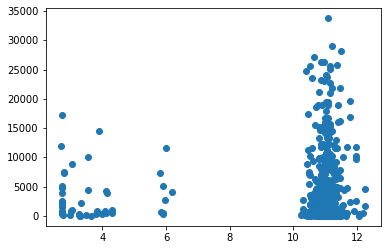

In [18]:
plt.scatter(Reg_target,features['last_pymnt_amnt']) # Graph with np.log

plt.show()

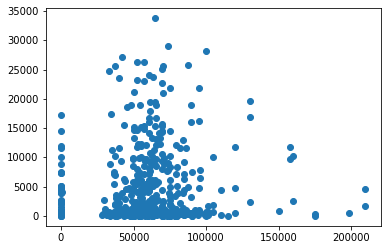

In [19]:
plt.scatter(features['Target_Salary'],features['last_pymnt_amnt']) #Graph without np.log

In [20]:
from collections import defaultdict  
from sklearn.preprocessing import LabelEncoder

In [21]:
#variables.columns

In [22]:
encoder_dict = defaultdict(LabelEncoder)
variables[['Business Title', 'Civil Service Title',
       'Division/Work Unit', 'CompanySize', 'DevType', 'YearsCodingProf']] = variables[['Business Title', 'Civil Service Title',
       'Division/Work Unit', 'CompanySize', 'DevType', 'YearsCodingProf']].apply(lambda x: encoder_dict[x.name].fit_transform(x))

In [23]:
from sklearn.model_selection import train_test_split
rxtrain,rxtest,rytrain,rytest=train_test_split(variables,Reg_target,test_size=0.2,shuffle=True,random_state=42)
cxtrain,cxtest,cytrain,cytest=train_test_split(variables,clf_target,test_size=0.2,shuffle=True,random_state=42)

In [24]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import cross_validate,GridSearchCV

In [25]:
reg = RandomForestRegressor(max_depth=2, random_state=0)
clf = RandomForestClassifier()

In [26]:
reg.fit(rxtrain,rytrain)



D:\anacondaaa\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [27]:
#rxtrain.dtypes

In [28]:
#rytest.shape

In [29]:
prdct = reg.predict(rxtrain)

In [30]:
prdct.shape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import f1_score , accuracy_score

In [31]:
RMSEtrain = (np.sum((prdct-rytrain)**2)/len(prdct))**0.5

In [32]:
RMSEtrain

1.7896600797700082

In [33]:
tprd = reg.predict(rxtest)
RMSEtest = (np.sum((tprd-rytest)**2)/len(prdct))**0.5

In [34]:
RMSEtest

1.011983298710605

In [35]:
clf.fit(cxtrain,cytrain)

D:\anacondaaa\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
cprd = clf.predict(cxtest)

In [37]:
f1 = f1_score(cytest,cprd , average='weighted')

In [38]:
print(f'F1 wighted score is: {f1} ,RMSE value is: {RMSEtest}')

F1 wighted score is: 1.0 ,RMSE value is: 1.011983298710605
